In [2]:
"""import kagglehub
from scipy.io import loadmat
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("inancigdem/eeg-data-for-mental-attention-state-detection")

print("Path to dataset files:", path)

# Collect all file names
file_names = []
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        file_names.append(os.path.join(dirname, filename))"""

'import kagglehub\nfrom scipy.io import loadmat\nimport os\nimport matplotlib.pyplot as plt\nimport pandas as pd\nimport numpy as np\n\n# Download latest version\npath = kagglehub.dataset_download("inancigdem/eeg-data-for-mental-attention-state-detection")\n\nprint("Path to dataset files:", path)\n\n# Collect all file names\nfile_names = []\nfor dirname, _, filenames in os.walk(path):\n    for filename in filenames:\n        file_names.append(os.path.join(dirname, filename))'

In [3]:
from scipy.io import loadmat
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
path = '../Data'

# Collect all file names
file_names = []
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        file_names.append(os.path.join(dirname, filename))

In [5]:
# Khởi tạo danh sách để lưu trữ dữ liệu từ tất cả các file
all_data = []

# Duyệt qua tất cả các file và trích xuất dữ liệu
for file_name in file_names:
    # Tải file .mat
    mat = loadmat(file_name)

    # Trích xuất dữ liệu từ đối tượng 'o'
    mdata = mat['o']

    # Truy cập vào 'sampFreq' và 'data'
    sampFreq = mdata['sampFreq'][0][0][0][0]  # Tần số lấy mẫu
    data = mdata['data'][0, 0]  # Dữ liệu EEG

    # Thêm dữ liệu vào danh sách
    all_data.append(data)

    # # In ra tần số lấy mẫu và hình dạng của dữ liệu
    # print("Tần số lấy mẫu từ file {}: {}".format(file_name, sampFreq))
    # print("Kích thước của dữ liệu từ file {}: {}".format(file_name, data.shape))

In [6]:
# Kết hợp dữ liệu từ tất cả các file thành một array duy nhất
combined_data = np.concatenate(all_data, axis=0)
print("Kích thước dữ liệu kết hợp:", combined_data.shape)

Kích thước dữ liệu kết hợp: (12512552, 25)


Dữ liệu từ file ../Data\eeg_record1.mat: (308868, 25)


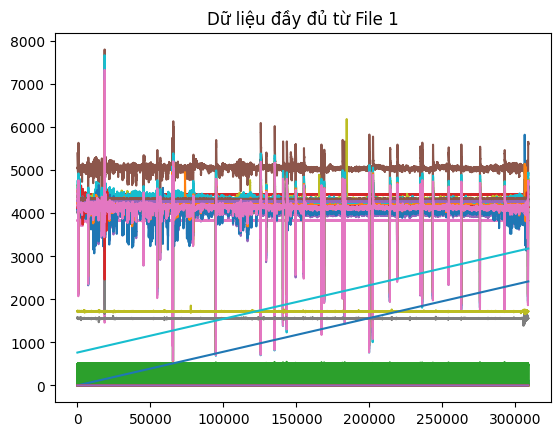


Dữ liệu EEG từ các kênh 4-17: (308868, 14)


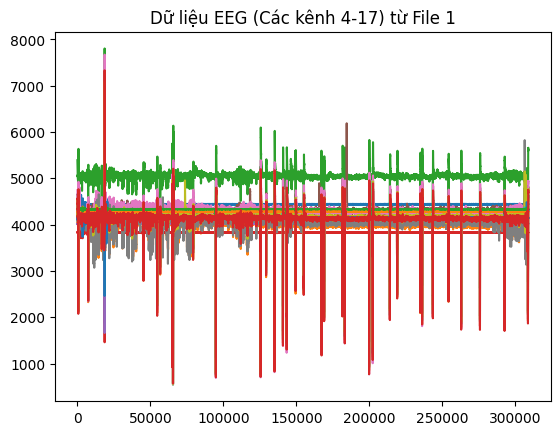


Các lần thử nghiệm: (1, 2, 14, 128)



In [7]:
# Phân tích dữ liệu từ 3 file đầu tiên
for i in range(1):
    record = loadmat(file_names[i])
    mdata = record['o']  # Đối tượng chính
    sample1 = {n: mdata[n][0, 0] for n in mdata.dtype.names}

    data = sample1['data']
    trials = sample1['trials']

    print('Dữ liệu từ file {}:'.format(file_names[i]), data.shape)
    plt.plot(data)
    plt.title(f'Dữ liệu đầy đủ từ File {i + 1}')
    plt.show()

    data_eeg = data[:, 3:17]
    print('\nDữ liệu EEG từ các kênh 4-17:', data_eeg.shape)
    plt.plot(data_eeg)
    plt.title(f'Dữ liệu EEG (Các kênh 4-17) từ File {i + 1}')
    plt.show()

    print('\nCác lần thử nghiệm:', trials.shape)
    print()

In [8]:
# Chuyển đổi sang Pandas DataFrame
combined_data = combined_data[:, 3:17]
columns = [f'Channel_{i}' for i in range(4, 18)]
df = pd.DataFrame(combined_data, columns=columns)

# Tên các kênh EEG tương ứng
channel_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

# Tạo ánh xạ giữa tên cột cũ và tên mới
rename_map = {f'Channel_{i}': name for i, name in zip(range(4, 18), channel_names)}

# Đổi tên cột trong DataFrame
df.rename(columns=rename_map, inplace=True)

In [9]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4440.000000,4417.948718,5390.769231,3833.846154,4019.487179,4656.410256,4742.051282,4415.384615,4538.461538,4308.205128,4125.641026,4283.589744,4335.384615,4563.589744
1,4439.487179,4417.948718,5389.230769,3830.256410,4020.000000,4658.974359,4738.974359,4414.871795,4535.897436,4308.205128,4136.410256,4284.615385,4331.794872,4566.666667
2,4438.974359,4414.871795,5385.641026,3829.743590,4017.948718,4655.897436,4734.358974,4414.871795,4537.435897,4308.205128,4152.820513,4283.076923,4333.846154,4557.948718
3,4438.974359,4410.256410,5381.025641,3831.794872,4016.410256,4649.230769,4730.256410,4409.743590,4535.384615,4308.717949,4157.948718,4283.076923,4334.358974,4552.820513
4,4439.487179,4407.179487,5378.461538,3831.282051,4019.487179,4647.692308,4729.230769,4408.205128,4526.666667,4307.179487,4157.948718,4285.641026,4334.358974,4546.666667


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12512552 entries, 0 to 12512551
Data columns (total 14 columns):
 #   Column  Dtype  
---  ------  -----  
 0   AF3     float64
 1   F7      float64
 2   F3      float64
 3   FC5     float64
 4   T7      float64
 5   P7      float64
 6   O1      float64
 7   O2      float64
 8   P8      float64
 9   T8      float64
 10  FC6     float64
 11  F4      float64
 12  F8      float64
 13  AF4     float64
dtypes: float64(14)
memory usage: 1.3 GB


In [11]:
describe_df = df.describe()
print(describe_df)

                AF3            F7            F3           FC5            T7  \
count  1.251255e+07  1.251255e+07  1.251255e+07  1.251255e+07  1.251255e+07   
mean   4.438423e+03  3.978590e+03  5.046510e+03  3.827878e+03  4.039227e+03   
std    1.375957e+01  5.704031e+01  8.104466e+01  4.377373e+00  1.715060e+01   
min    4.764103e+02  3.066667e+02  0.000000e+00  8.738462e+02  2.328205e+02   
25%    4.436410e+03  3.962564e+03  5.030769e+03  3.826154e+03  4.036410e+03   
50%    4.438974e+03  3.978974e+03  5.048718e+03  3.828205e+03  4.042051e+03   
75%    4.441026e+03  3.995385e+03  5.064103e+03  3.829744e+03  4.045128e+03   
max    7.060513e+03  7.808205e+03  8.401538e+03  5.400000e+03  4.515385e+03   

                 P7            O1            O2            P8            T8  \
count  1.251255e+07  1.251255e+07  1.251255e+07  1.251255e+07  1.251255e+07   
mean   4.317302e+03  4.285819e+03  4.028388e+03  4.165090e+03  4.308545e+03   
std    8.714620e+01  8.043262e+01  6.633326e+01  6.

In [12]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Khảo sát phân bố dữ liệu bằng biểu đồ
# plt.figure(figsize=(12, 6))
# sns.histplot(df, kde=True, bins=50, palette='viridis', element='step', alpha=0.6)
# plt.title('Distribution of EEG Data Across All Channels')
# plt.xlabel('Amplitude')
# plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()

In [13]:
# # Vẽ thêm box plot cho dữ liệu EEG
# plt.figure(figsize=(15, 8))
# sns.boxplot(data=df, palette='viridis')
# plt.title('Box Plot of EEG Data Across All Channels')
# plt.xlabel('Channels')
# plt.ylabel('Amplitude')
# plt.tight_layout()
# plt.show()

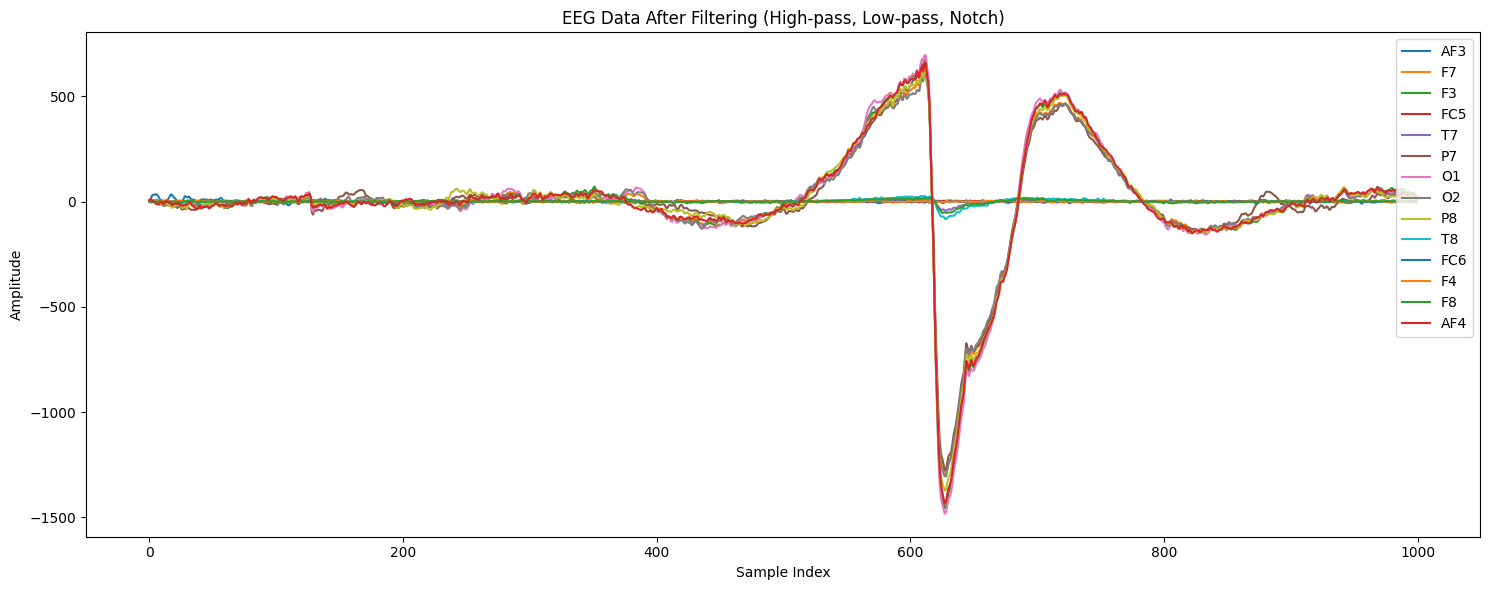

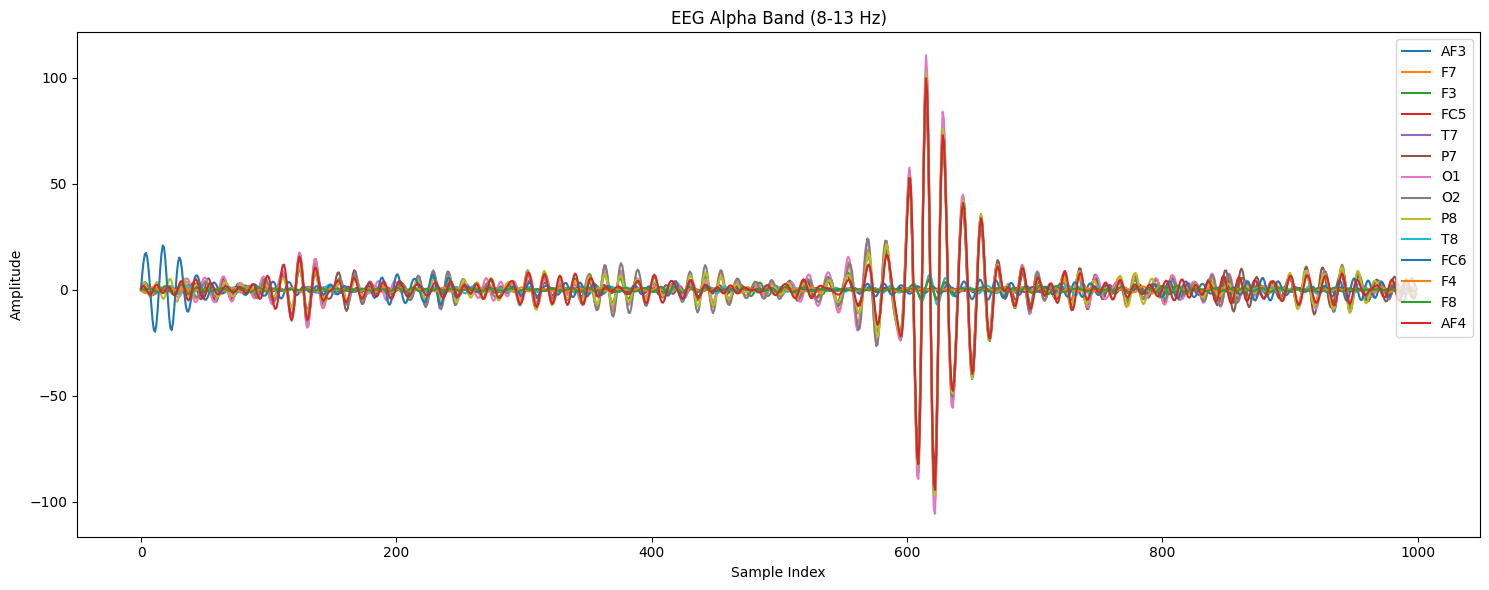

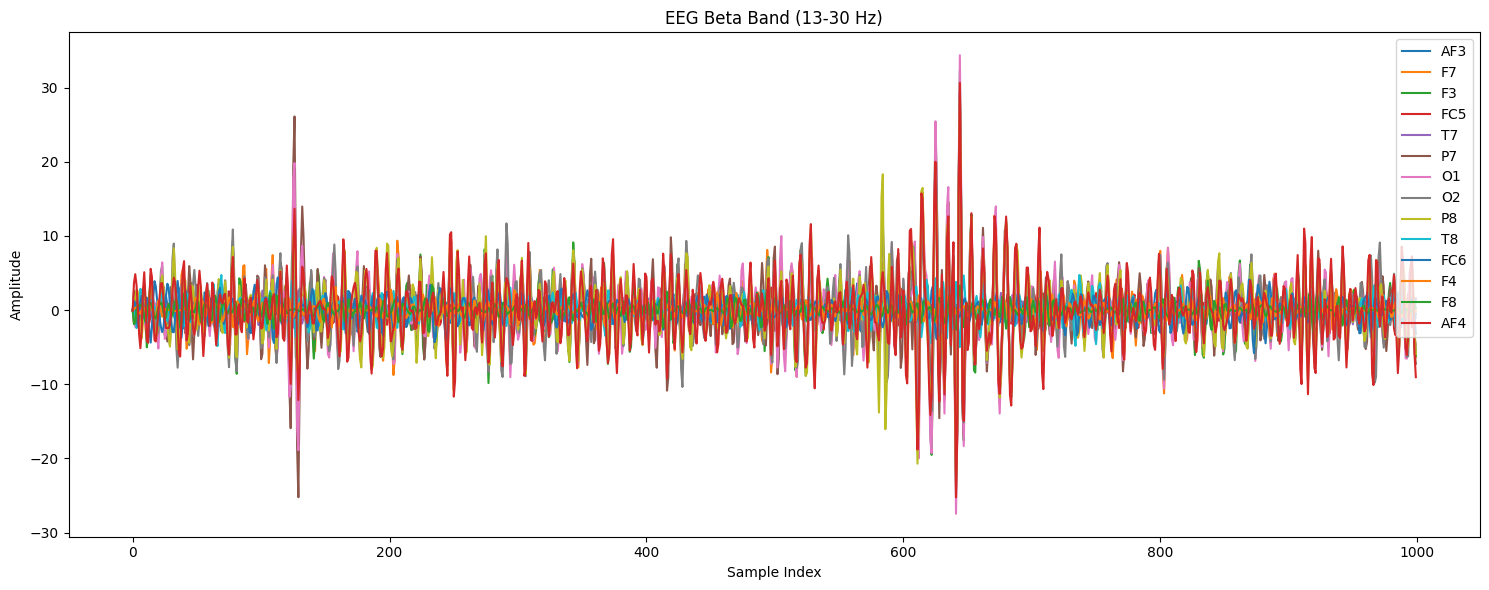

In [15]:
from scipy.signal import butter, filtfilt, iirnotch
import matplotlib.pyplot as plt

# Hàm tạo bộ lọc thông cao và thông thấp
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data, axis=0)

# Hàm tạo bộ lọc notch
def notch_filter(data, notch_freq, fs, quality_factor=30):
    nyquist = 0.5 * fs
    notch = notch_freq / nyquist
    b, a = iirnotch(notch, quality_factor)
    return filtfilt(b, a, data, axis=0)

# Lọc thông cao và thông thấp
lowcut = 0.5  # Hz
highcut = 50  # Hz
fs = 128  # Tần số lấy mẫu

filtered_data = bandpass_filter(df.values, lowcut, highcut, fs)

# Lọc notch để loại bỏ nhiễu 50 Hz
notch_freq = 50  # Hz
filtered_data = notch_filter(filtered_data, notch_freq, fs)

# Chuyển dữ liệu đã lọc sang DataFrame để dễ quản lý
filtered_df = pd.DataFrame(filtered_data, columns=df.columns)

# Biểu diễn tín hiệu sau khi lọc
plt.figure(figsize=(15, 6))
plt.plot(filtered_df.iloc[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
plt.title('EEG Data After Filtering (High-pass, Low-pass, Notch)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend(filtered_df.columns, loc='upper right')
plt.tight_layout()
plt.show()

# Lọc thông dải để giữ lại dải alpha (8-13 Hz) hoặc beta (13-30 Hz)
alpha_low = 8  # Hz
alpha_high = 13  # Hz
beta_low = 13  # Hz
beta_high = 30  # Hz

alpha_band = bandpass_filter(filtered_df.values, alpha_low, alpha_high, fs)
beta_band = bandpass_filter(filtered_df.values, beta_low, beta_high, fs)

# Biểu diễn tín hiệu dải alpha
plt.figure(figsize=(15, 6))
plt.plot(alpha_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
plt.title('EEG Alpha Band (8-13 Hz)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend(filtered_df.columns, loc='upper right')
plt.tight_layout()
plt.show()

# Biểu diễn tín hiệu dải beta
plt.figure(figsize=(15, 6))
plt.plot(beta_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
plt.title('EEG Beta Band (13-30 Hz)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend(filtered_df.columns, loc='upper right')
plt.tight_layout()
plt.show()
